## PROCESSAMENTO DE IMAGENS 

**Objetivos da aula:**

*   apresentar uma introdução sobre aprendizado de máquina
*   apresentar e aplicar o haar cascade para detecção de face
*   apresentar uma intuição do algoritimo de Viola Jones




**Como fazer a deteção de faces?**

O nosso objetivo hoje é compreender a essencia de algoritimos para detecção facial, apenas reforçando que já sabemos, esses algoritmos são utilizados para diversas aplicações, desde a lendaria camera tekpix, passando por smartphones e o google fotos para classificador na organização de pastas por pessoas, por exemplo. 



**Aprendizado de máquina**

Antes de entrar em tecnicas mais avançadas de Deep Learning em visão computacional, vamos introduzir este tema estudando e aplicando o método muito clássico de classificação em cascata de faces desenvolvido por Viola e Jones, na OpenCV temos exemplares pré-treinados para detecção de faces e de olhos.


**Classificador Haar-Cascade **

Você vai ver em todo e qualquer curso ou livro de visão computacional o detector de face de Viola-Jones sendo mencionado. Inventado em 2001, foi disruptivo no campo da visão computacional, por que finalmente permitiu a detecção e o reconhecimento de rostos em tempo real. 

Muito obrigado Viola e Jones :)

ref: https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf
https://docs.opencv.org/master/db/d28/tutorial_cascade_classifier.html




Para apresentar uma intuição de como funciona, vamos imaginar o seguinte:

Algumas caracteristicas do rosto são bem definidas e conseguimos correlacionar tais como bochecha com olhos, testa com nariz.... Para encontrar essas correlações usamos a ideia de feature e convolução que ja estudamos. Podemos visualizar essa técnica no gif da Lena.

<img1 src="acumulador.jpg">







<img src="lena-viola-jones.gif">

ref. https://vimeo.com/12774628



### Implementação na OpenCV


Vamos implementar um detector de face baseado em haar cascade, como essa técnica é baseada em machine learning, vamos utilizar uma rede com os pesos do classificador treinado e dispoiniblizado pela OpenCV. 

Já temos esses arquivos com os pesos das redes quando instalamos a OpenCV, o que temos que fazer é carregar esses pesos.
 

In [78]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#caminho onde estão os pesos
path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

# Inicializa o classificador cascade
face_classifier = cv2.CascadeClassifier(path) 

print("Os pesos estão no diretorio: ", path) 


Os pesos estão no diretorio:  /home/iot/.local/lib/python3.8/site-packages/cv2/data/haarcascade_frontalface_default.xml


# Desafio 1 

Pode acontecer de não encontrar o caminho do diretorio com os pesos. Como sugetão, verifique se ja possui os arquivos de pesos. Caso não encontre, será necessário fazer o download desses pesos. Para facilitar a vida, na pasta ***cascade*** já estão os pesos note que são varios arquivos. Faça os ajustes necessários para carregar os pesos da rede. 

vamos usar o **"haarcascade_frontalface_default.xml"**.


In [26]:
# Faça aqui os ajustes que forem necessários.....











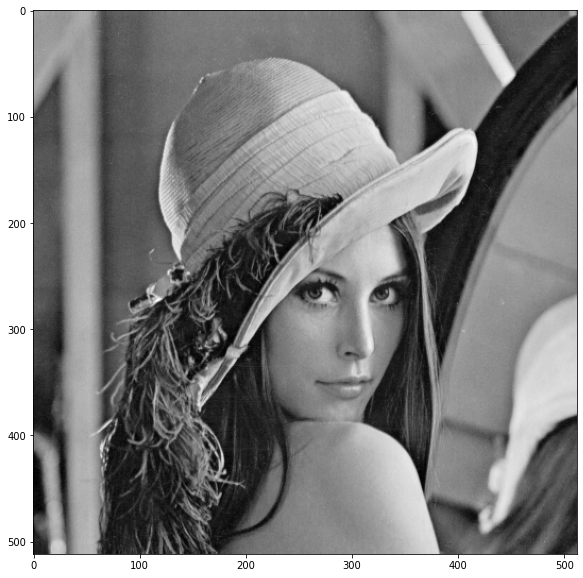

In [79]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Inicializa o classificador cascade
face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 


# carrega uma imagem para detectar o rosto
img1 = cv2.imread('lena.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(img1_gray, cmap="gray"); plt.show();



O método detectMultiScale() realiza o processo de varredura que vimos no gif acima e retorna uma lista com as faces encontrardas.

Este possui 3 parametros principais;

    gray image – Imagem de entrada na escala de cinza.
    scaleFactor – Parametro para ajustar a escala, em uma imagem pode conter rostos maiores e menores. Esse parametro tenta corrigir isso.
    minNeighbors – Este parâmetro especifica o número de vizinhos que uma janela deve ter para ser chamado de face. 
    
Você pode ler mais sobre isso aqui. https://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale


In [80]:
# O método detectMultiScale() realiza o processo de varredura que vimos no gif acima e retorna uma lista com as faces encontrardas.

faces_return = face.detectMultiScale(img1_gray, scaleFactor = 1.2, minNeighbors = 5)


print('Faces encontradas: ', len(faces_return),type(faces_return), faces_return)
print("")
print("x:", faces_return[0][0])
print("y:", faces_return[0][0])
print("x e y, representam a coodenada top esquerda da face detectada")
print("")
print("Largura :", faces_return[0][0])
print("Altura:", faces_return[0][0])

Faces encontradas:  1 <class 'numpy.ndarray'> [[224 210 156 156]]

x: 224
y: 224
x e y, representam a coodenada top esquerda da face detectada

Largura : 224
Altura: 224


In [81]:
## Dica rápida de python

#Podemos iterar varias listas ao mesmo tempo dentro de um unico *for* de forma simultanea usando o python

# Exemplo, vamos criar uma lista qualquer 

a = np.array([["x", "y", "largura", "altura"]])

print (a)
for (x,y,w,h) in a:
    print("posição (x,y): ", x,y, "largura: ", w, "altura",h)


[['x' 'y' 'largura' 'altura']]
posição (x,y):  x y largura:  largura altura altura


# Desafio 2

Usando as posições da lista *face_return*. Implemente uma função que desenha um um retangulo sobre a face detectada.

In [ ]:
    # Implemente sua solução aqui.....









    

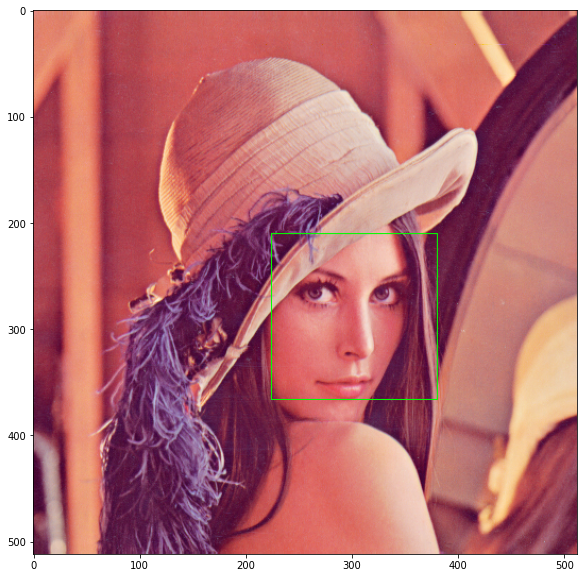

In [82]:
for (x, y, w, h) in faces_return:
        cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 1)


# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)); plt.show();

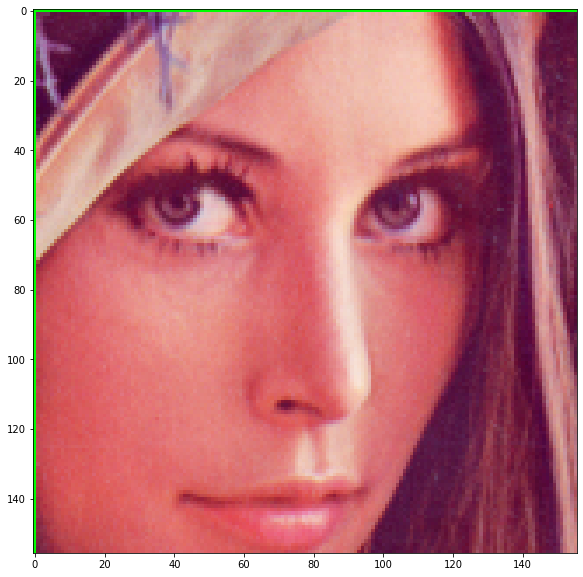

In [88]:
# Vamos fazer um nova imagem que será o recorte (crop) apenas do rosto detectado. Vamos lembrar de slice...

img_face = img1[y:y+h, x:x+w]


# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img_face,cv2.COLOR_BGR2RGB)); plt.show();




# Desafio 3

Faça a deteção dos olhos da Lena, carrege os pesos que correspodem a detecção de olhos e implemente sua solução. 

Dica: Os olhos fazem parte da face, nesse sentido, não é necessário fazer a varredura em toda a imagem, basta fazer a varredura dentro dos limites onde está contida a face, concorda???



In [ ]:
# implemente aqui sua sulução.............











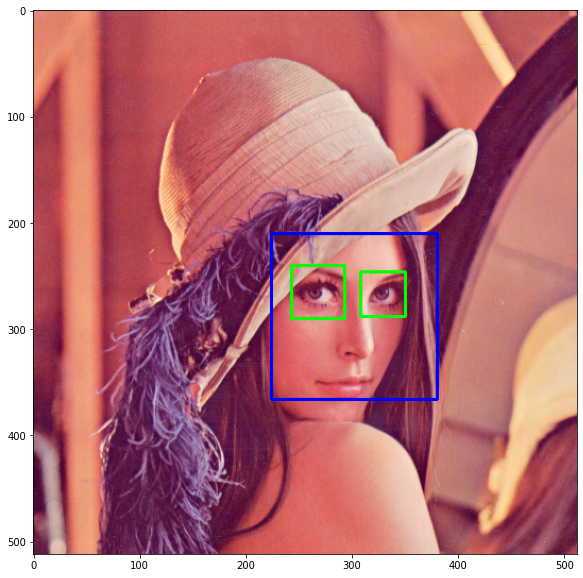

In [92]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#caminho onde estão os pesos
path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
path2 = cv2.data.haarcascades + "haarcascade_eye.xml"

# Inicializa o classificador cascade
face_classifier = cv2.CascadeClassifier(path) 
olhos_classifier = cv2.CascadeClassifier(path2) 


# carrega uma imagem para detectar o rosto
img1 = cv2.imread('lena.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


faces_return = face.detectMultiScale(img1_gray, scaleFactor = 1.2, minNeighbors = 5)


for (x,y,w,h) in faces_return:
    cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img1_gray[y:y+h, x:x+w]
    roi_color = img1[y:y+h, x:x+w]
    eyes = olhos_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)); plt.show();


# Desafio 4

No inicio da aula falamos que o método de Viola-Jones foi desruptivo por que tornou capaz a detecção de faces em tempo real. 
Implemente um código .py que realiza a deteção em tempo real, capturando a imagem da sua webcam.




In [ ]:
### Uma sugestão de implementação esta no arquivo "haarFace.py" 